In [1]:
import pdb
import sys
from scipy.io import readsav
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sys.path.append("..")

from pseudospectrumwrapper import PseudoSpectrumWrapper
from pseudospectrum import PseudoSpectrum
from pseudospectrumplots import PseudoSpectrumPlots
from toolbox import Toolbox

from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
iterations = 1

In [3]:
# Define Path to configuration file
path_ini_file = os.path.join(".","config","hersXhers.ini")

In [4]:
# Use PseudoSpectrum to read in config file
#mask='kaiser'
mask='blackman'
mask='hanning'
pseudospectrum_object = PseudoSpectrumWrapper(path_ini_file,
                                              read_maps=True,
                                              save_automatically=True,
                                              overwrite_results=True,
                                              mask=mask,
                                              #mask={mask: 6},
                                             )
pseudospectrum_object = PseudoSpectrumPlots(pseudospectrum_object)
pseudospectrum_object.copy_config_file(path_ini_file, overwrite_results=True)

hers_act_psw
17.6
hers_act_pmw
23.9
hers_act_plw
35.2


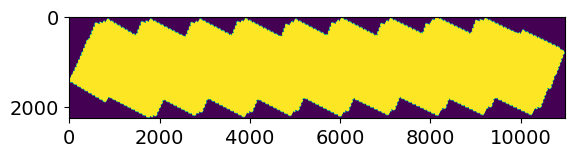

In [5]:
plt.imshow(pseudospectrum_object.maps_dict['hers_act_psw']['masks']['mask']);

In [6]:
pseudospectrum_object.maps_dict['hers_act_psw']['masks'].keys()

dict_keys(['mask', 'hanning'])

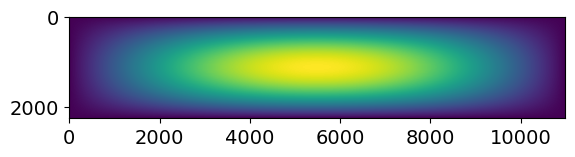

In [7]:
plt.imshow(pseudospectrum_object.maps_dict['hers_act_psw']['masks'][mask]);

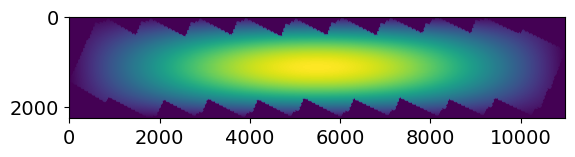

In [8]:
plt.imshow(pseudospectrum_object.maps_dict['hers_act_psw']['masks']['mask']*
           pseudospectrum_object.maps_dict['hers_act_psw']['masks'][mask]);

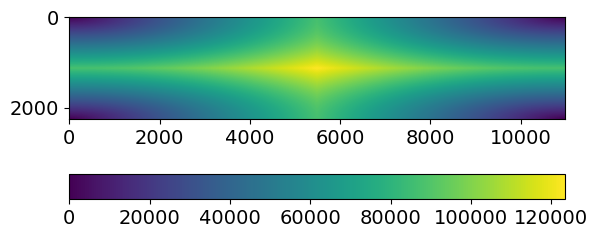

In [9]:
plt.imshow(pseudospectrum_object.maps_dict['hers_act_psw']['kmap']);
plt.colorbar(orientation="horizontal");

In [12]:
# Create MKK
mkk_dict = pseudospectrum_object.get_mkks(iterations=iterations, cross_spectra=False, overwrite=True)

Calculating hers_act_pswxhers_act_pswx1 mkk
Iteration 1/1
Calculating hers_act_pmwxhers_act_pmwx1 mkk
Iteration 1/1
Calculating hers_act_plwxhers_act_plwx1 mkk
Iteration 1/1


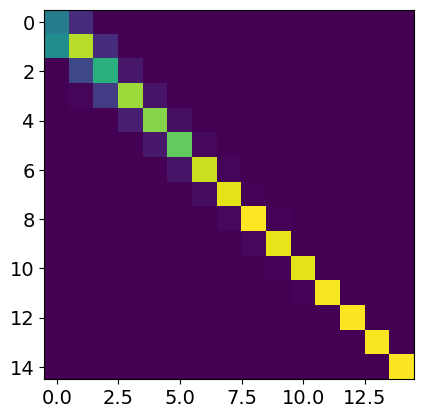

In [13]:
plt.imshow(mkk_dict['hers_act_pswxhers_act_pswx{0:0.0f}'.format(iterations)]);

In [14]:
maps_dict = pseudospectrum_object.maps_dict

In [15]:
pk_dict = pseudospectrum_object.get_pseudospectra(mkk_dict, maps_dict=maps_dict, iterations=iterations, cross_spectra=False, overwrite=True)

Calculating hers_act_pswXhers_act_psw fft
Calculating hers_act_pswXhers_act_pswX1 pk
Calculating hers_act_pmwXhers_act_pmw fft
Calculating hers_act_pmwXhers_act_pmwX1 pk
Calculating hers_act_plwXhers_act_plw fft
Calculating hers_act_plwXhers_act_plwX1 pk


417476


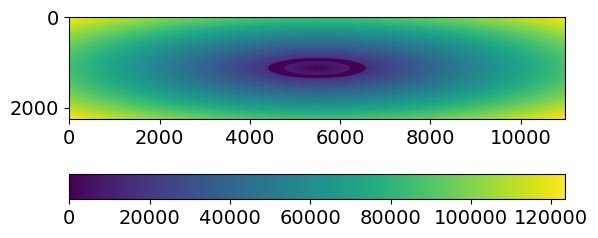

In [16]:
kmap=pseudospectrum_object.maps_dict['hers_act_psw']['kmap'].copy()
ell=pk_dict['hers_act_pswxhers_act_psw']['ell']
ind_ell = (kmap >= ell[11]) & (kmap < ell[12])
print(np.sum(ind_ell))
kmap[ind_ell] = 0
dims=np.shape(kmap)
plt.imshow(Toolbox.shift_twod(kmap,dims[1]/2,dims[0]/2))
plt.colorbar(orientation="horizontal");

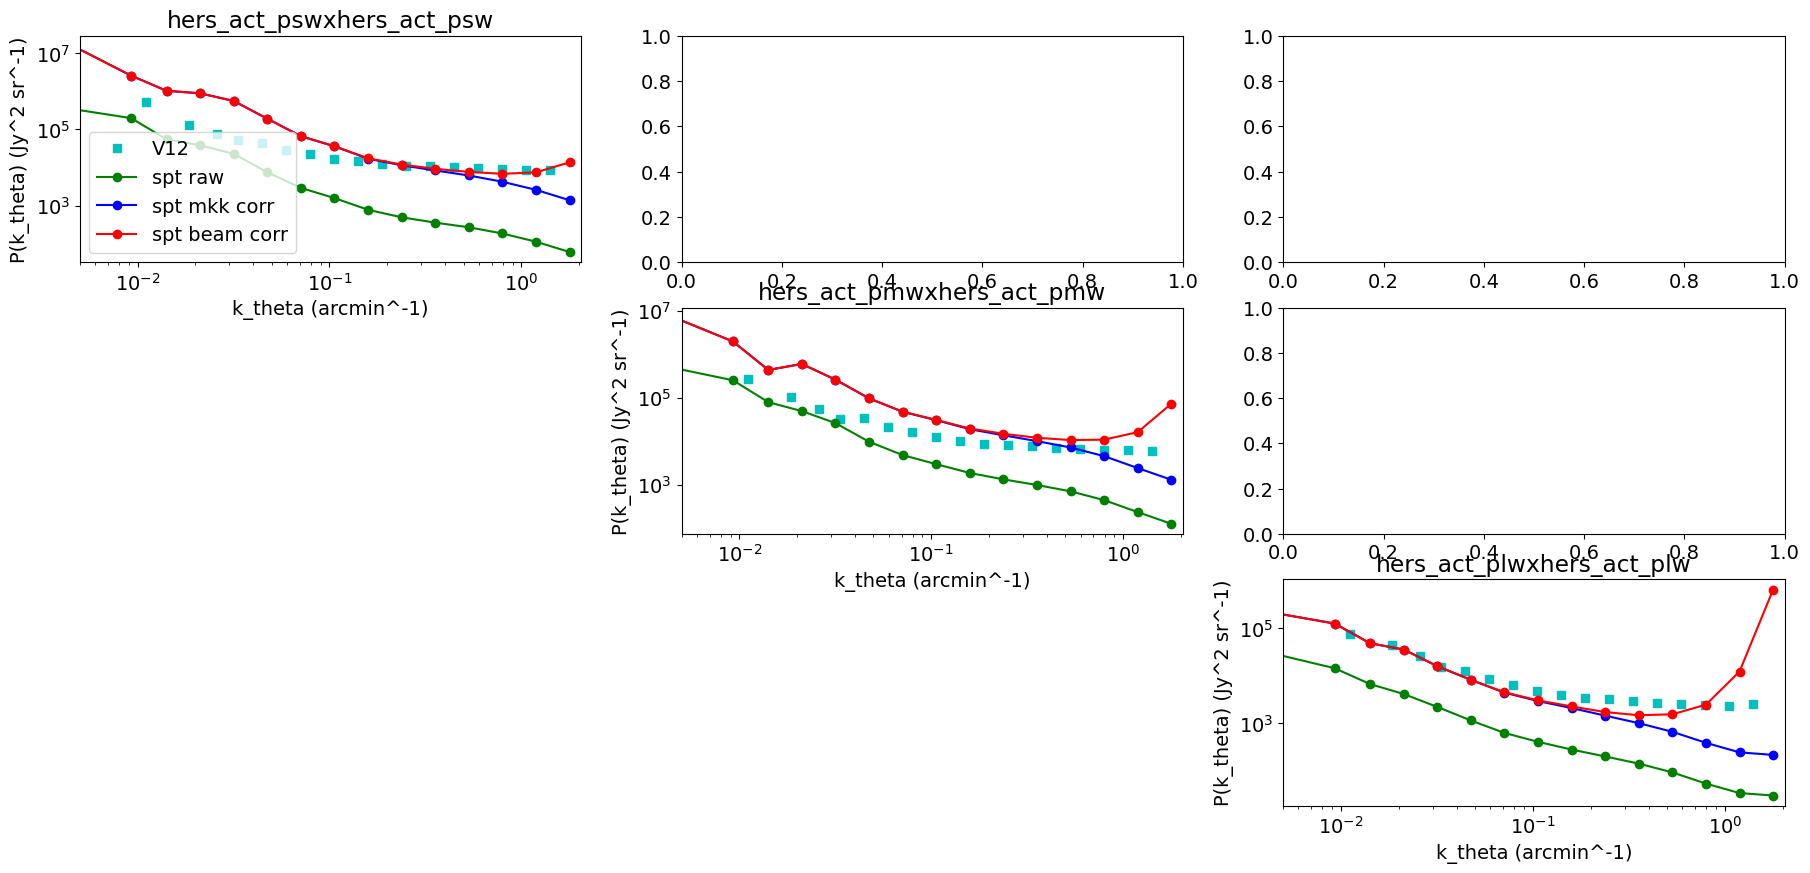

In [18]:
pseudospectrum_object.plot_crossspectra(pk_dict)

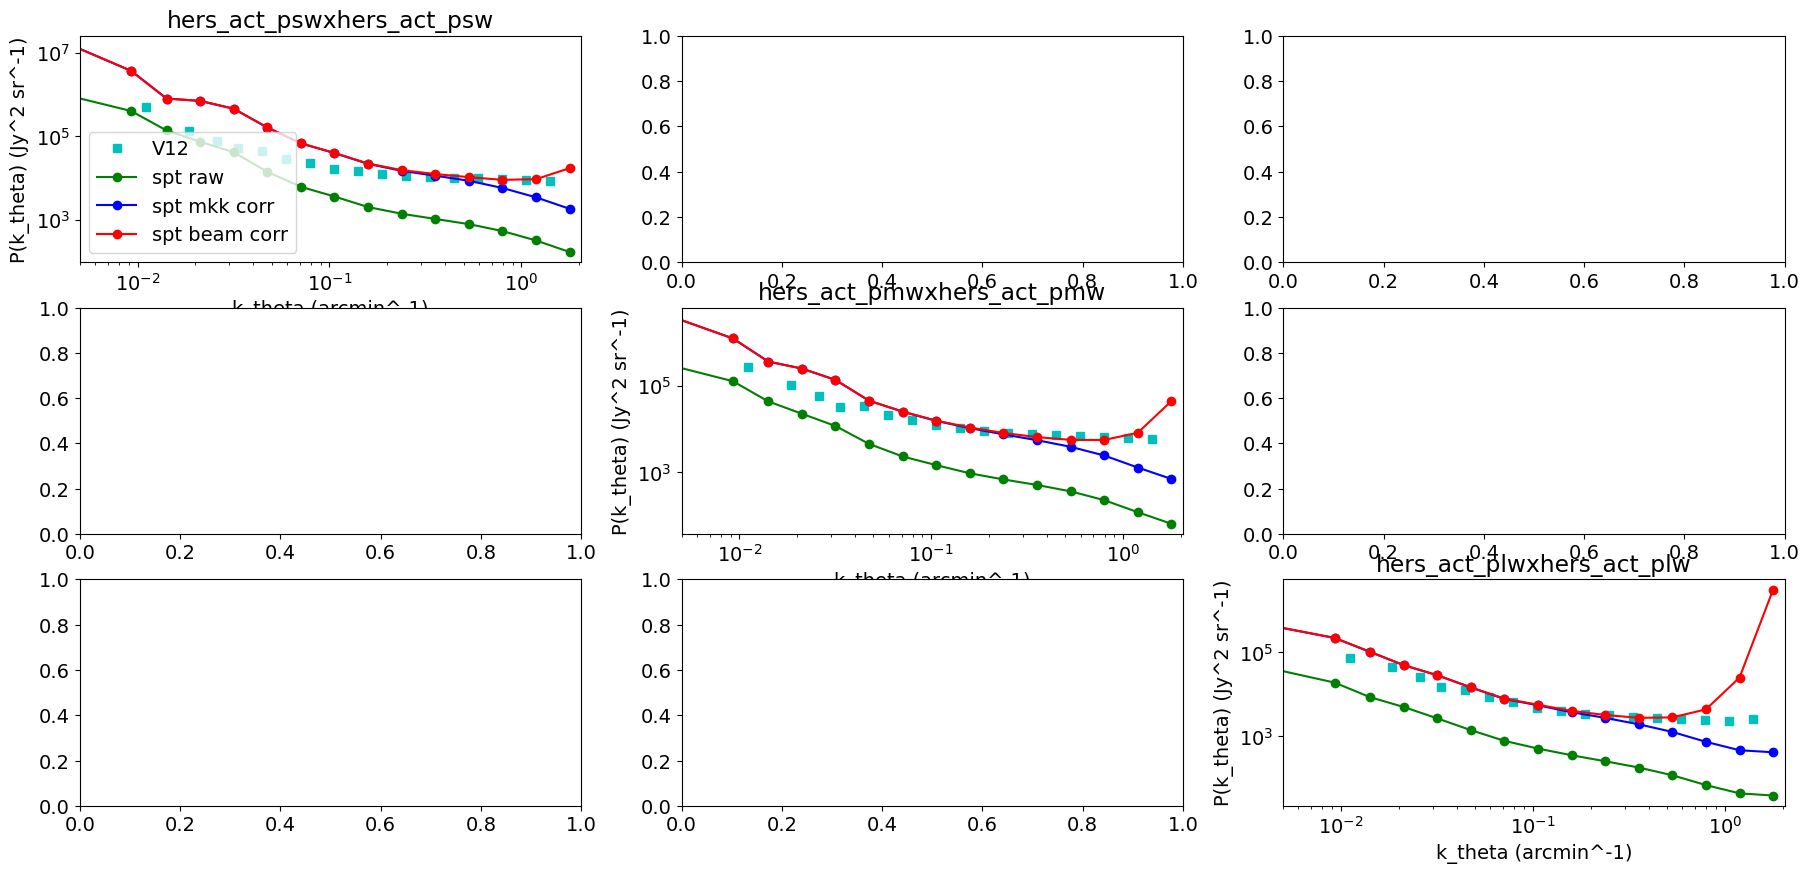

In [16]:
pseudospectrum_object.plot_pseudospectra(pk_dict)

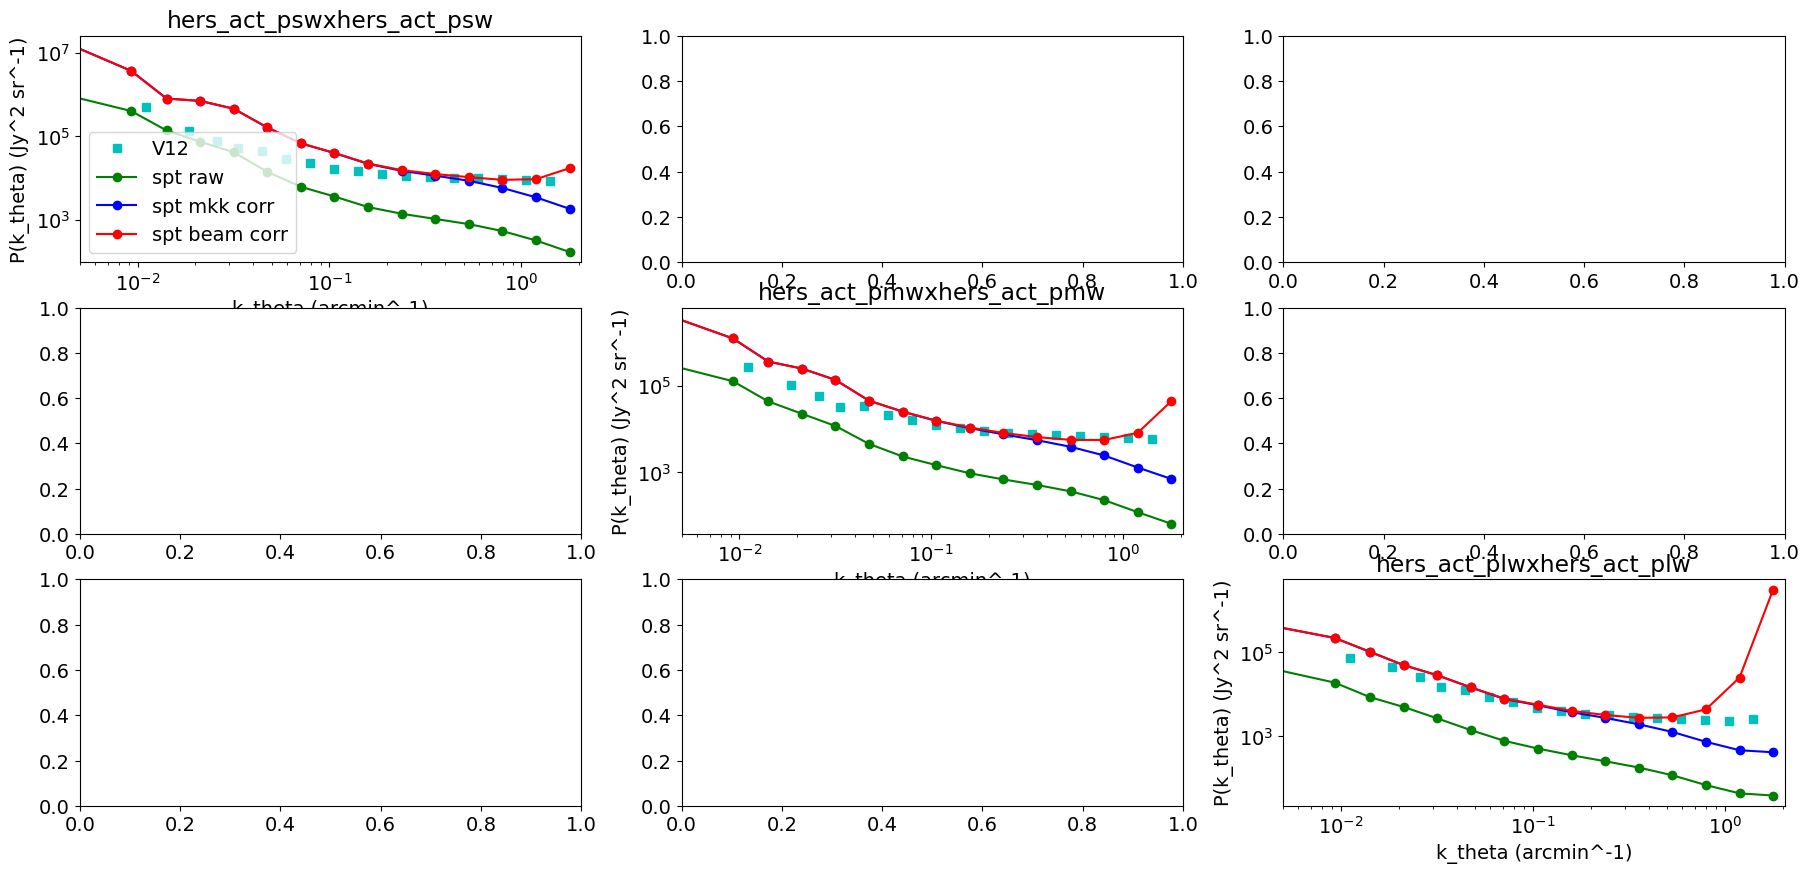

In [16]:
pseudospectrum_object.plot_pseudospectra(pk_dict)